# ISE529 Predictive Analytics
**Homework #1**

**Student Name:** `André Ramolivaz` <br>
**NetID:** `3933665317` <br>
**Due Date:** `2025-06-02`

### Setup
Import all required packages below.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

---
## Question 1
*20 points*
![Logo Python](1.png)


**(a)** Better for a flexible method. <br>

**Explanation:** With plenty of observations, the variance component of a flexible model shrinks (see the test-MSE U-shape and bias–variance slides 37-39 in Predictive Modeling). Low variance plus its intrinsically low bias let a flexible method capture subtle patterns that an inflexible model, constrained to high bias, would miss. Over-fitting risk is minimal because the data vastly outnumber the parameters.

**(b)** Worse for a flexible method. <br>

**Explanation:** Slides on overfitting and high-dimensional settings (same section) show that when predictors greatly outnumber observations, flexible models explode in variance: they can match the training noise exactly but generalize poorly. Inflexible methods impose structure, trading a bit of bias for a big cut in variance, and so deliver lower expected test error.

**(c)** Better for a flexible method.

**Explanation**: The regression-extensions slides (interaction terms, polynomials, splines; slides 50-54 in Linear Regression II) emphasize that inflexible models assume linearity and incur large bias under true non-linearity. Flexible approaches adapt to curvature and interactions, reducing bias enough to offset their higher variance, and thus achieve lower prediction error.

**(d)** Worse for a flexible method.

**Explanation** In the test-MSE decomposition (slides 43-45 in Predictive Modeling), the irreducible error $\sigma ^2$
  is fixed. When it is large, any model’s predictions are noisy; a flexible method’s extra variance compounds this noise and amplifies overfitting, while an inflexible model’s stronger assumptions damp the variance component. Hence the inflexible approach is more robust when the data are inherently noisy.


---
## Question 2
*25 points*
![Logo Python](2.png)

**(a)**

/var/folders/7l/9mpg_4kx7_zbbl179wmh30sc0000gn/T/ipykernel_962/1939129495.py:23: UserWarning: Glyph 10230 (\N{LONG RIGHTWARDS ARROW}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/7l/9mpg_4kx7_zbbl179wmh30sc0000gn/T/ipykernel_962/1939129495.py:23: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/andreramolivaz/PyCharmMiscProject/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10230 (\N{LONG RIGHTWARDS ARROW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/andreramolivaz/PyCharmMiscProject/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


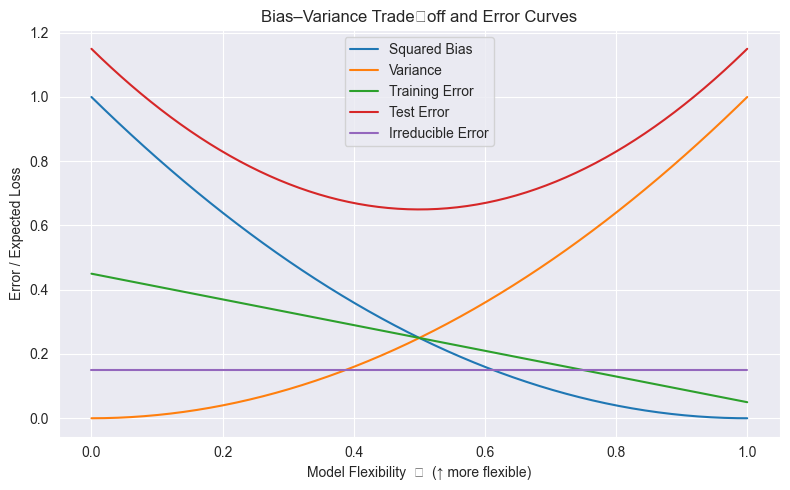

In [8]:
# Synthetic flexibility axis
x = np.linspace(0, 1, 200)  # 0 = very inflexible, 1 = very flexible

# Curves (arbitrary smooth shapes that match the canonical theory picture)
bias_sq = (1 - x)**2                   # Squared bias: high when inflexible, low when flexible
variance = x**2                        # Variance: low when inflexible, high when flexible
irreducible = np.full_like(x, 0.15)    # Irreducible error: flat horizontal line

training_error = 0.4 * (1 - x) + 0.05  # Training error: declines monotonically
test_error = bias_sq + variance + irreducible  # Test error: U‑shaped

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, bias_sq, label="Squared Bias")
plt.plot(x, variance, label="Variance")
plt.plot(x, training_error, label="Training Error")
plt.plot(x, test_error, label="Test Error")
plt.plot(x, irreducible, label="Irreducible Error")
plt.xlabel("Model Flexibility  ⟶  (↑ more flexible)")
plt.ylabel("Error / Expected Loss")
plt.title("Bias–Variance Trade‑off and Error Curves")
plt.legend()
plt.tight_layout()
plt.show()

**(b)** As we move from rigid to highly flexible models, the bias in the fitted function falls because a richer function class can approximate the true 𝑓(𝑋) more closely; hence the squared-bias curve slopes downward. That same additional flexibility, however, makes the fitted model much more sensitive to the idiosyncrasies of a particular training set, so the sampling variability of the estimate rises: this gives the upward-sloping variance curve.

Training error declines monotonically for a simple reason: with every extra parameter or degree of freedom the model can fit the observed responses at least as well as before and often markedly better, so the training-error curve falls steadily.

Irreducible error—the variance of the noise term 𝜀 is determined by aspects of the data-generation process that no model can capture, so it appears as a flat horizontal line.

The test-error curve is the sum of squared bias, variance and irreducible error (slides 43–45 of Predictive Modeling): at the left edge it is high because bias dominates; at the right edge it is high because variance dominates; in between it reaches a minimum where the fall in bias is just balanced by the rise in variance. This combination produces the familiar U-shape that characterises the bias–variance trade-off.


**(c)** Let:  $
\hat f_{0} \equiv \hat f(x_{0}), \qquad
f_{0} \equiv f(x_{0}), \qquad
\mu_{0} \equiv \mathrm{E}_{\text{train}}[\hat f_{0}].
$

$u_{0}$ is the mean of the estimator at $x_0$.
Bias and variance are: $
\text{Bias}(\hat f_{0}) = \mu_{0}-f_{0},
\qquad
\text{Var}(\hat f_{0}) = \mathrm{E}[(\hat f_{0}-\mu_{0})^{2}].
$

$
\begin{aligned}
E[(f_{0}-\hat f_{0})^{2}]
    &= E\Big(
           \{(f_{0}-\mu_{0}) - (\hat f_{0}-\mu_{0})\}^{2}
       \Big)              \\[4pt]
    &= (f_{0}-\mu_{0})^{2}
       + E[(\hat f_{0}-\mu_{0})^{2}]
       - 2\,(f_{0}-\mu_{0})\,
         E[\hat f_{0}-\mu_{0}] \\[4pt]
    &= (f_{0}-\mu_{0})^{2} + \text{Var}(\hat f_{0}),
\end{aligned}
$

since $E[\hat f_{0}-\mu_{0}]=0$.
Replacing the first term with $\text{Bias}(\hat f_{0})^{2}$ proves the identity.

**Numerical check with an example**

We simulate repeated training sets from  $
Y = 2 + 3X + \varepsilon, \qquad
\varepsilon \sim \mathcal N(0,1),
$

estimate $\hat f(x_0)$ with simple linear regression, and compare empirical
$E[(f-\hat f)^2]$ to $\text{Var}+\text{Bias}^2$.





In [9]:
rng       = np.random.default_rng(2025)   # set.seed(2025)
x0        = 1.5
f0        = 2 + 3 * x0                    # true f(x0)
n_train   = 30
n_rep     = 5000
ests      = np.empty(n_rep)

# --- 2  Monte-Carlo loop -----------------------------------------------------
for b in range(n_rep):
    x = rng.uniform(-1, 2, size=n_train)
    y = 2 + 3 * x + rng.normal(size=n_train)
    model = LinearRegression().fit(x.reshape(-1, 1), y)
    ests[b] = model.predict(np.array([[x0]]))[0]

# --- 3  Bias, variance, decomposition ---------------------------------------
mu_hat  = ests.mean()
bias_sq = (mu_hat - f0)**2
var_hat = ests.var(ddof=1)             # sample variance

lhs = np.mean((f0 - ests)**2)          # empirical E[(f - fhat)^2]
rhs = bias_sq + var_hat

# --- 4  Results table --------------------------------------------------------
out = pd.DataFrame({
    "Quantity": ["Empirical  E[(f - fhat)^2]", "Var(fhat) + Bias^2"],
    "Value":    [lhs, rhs]
}).round(4)

print(out.to_string(index=False))

                  Quantity  Value
Empirical  E[(f - fhat)^2] 0.0816
        Var(fhat) + Bias^2 0.0816


---
## Question 3
*15 points*
![Logo Python](3.png)

For a discrete random variable $X$ with support $x_i$ and probabilities $p_i$:
$$
E[X] \,=\, \sum_i x_i p_i, \qquad
\operatorname{Var}(X) \,=\, \sum_i (x_i - E[X])^2 p_i.
$$

The same formulas hold for $Y$.

In [10]:
x_values = np.array([15.85, 15.90, 16.00, 16.10, 16.20])

# Probabilities for company A (X) and company B (Y)
p_X = np.array([0.15, 0.21, 0.35, 0.15, 0.14])
p_Y = np.array([0.14, 0.05, 0.64, 0.08, 0.09])

# Compute expectations
E_X = (x_values * p_X).sum()
E_Y = (x_values * p_Y).sum()

# Compute variances
Var_X = ((x_values - E_X)**2 * p_X).sum()
Var_Y = ((x_values - E_Y)**2 * p_Y).sum()

# Assemble results
summary = pd.DataFrame({
    'Quantity': ['E[X]', 'E[Y]', 'Var(X)', 'Var(Y)'],
    'Value': [E_X, E_Y, Var_X, Var_Y]
})
print(summary.to_string(index=False))

Quantity     Value
    E[X] 15.999500
    E[Y] 16.000000
  Var(X)  0.012575
  Var(Y)  0.008050


**Interpretation:** Both companies, on average, hit the 16-ounce target almost exactly—Company A’s expected fill is 15.999 oz and Company B’s is 16.000 oz—so neither shows systematic under- or over-filling. The difference lies in consistency: A’s variance of 0.0126 oz² corresponds to a standard deviation of about 0.11 oz, whereas B’s variance of 0.00805 oz² yields a standard deviation of roughly 0.09 oz. In practical terms, bottles from A typically deviate close to ±0.11 oz from the mean, while those from B deviate only close to ±0.09 oz. Because B’s spread is narrower, its process can be set closer to the nominal 16 oz without risking legal underfill, reducing product give-away and conveying higher manufacturing precision to consumers, even though both firms are equally accurate at meeting the label weight.


---
## Question 4
*15 points*
![Logo Python](4.png)

(a) For the test point $(X_1, X_2, X_3) = (0,0,0)$ the Euclidean distance to each training observation is:
$$d_i= \sqrt{(X_1i-0)^2+(X_2i-0)^2+(X_1i-0)^2}$$

In [11]:
X = np.array([[0,3,0],
              [2,0,0],
              [0,1,3],
              [0,1,2],
              [-1,0,1],
              [1,1,1]])
d = np.linalg.norm(X, axis=1)
print(pd.DataFrame({'Obs':np.arange(1,7), 'Distance':d}).to_string(index=False))

 Obs  Distance
   1  3.000000
   2  2.000000
   3  3.162278
   4  2.236068
   5  1.414214
   6  1.732051


**(b)** For the test point (0,0,0) the closest observation is #5, labelled Green.
Hence with 𝐾 = 1  the K-NN rule assigns the class Green, because the prediction is simply the response of the single nearest neighbour.

With
𝐾 = 3 we consider the three nearest points:
- #5 distance: 1.414214 -> Green
- #6 distance: 1.732051 -> Red
- #2 distance: 2 -> Red

The majority among these three is Red (two Reds, one Green), so the 𝐾 = 3
 classifier predicts Red. The difference occurs because a larger 𝐾 smooths the decision by averaging over more neighbours, allowing the two slightly more distant Red bottles to out-vote the single closest Green one.

**(c)** When the Bayes decision boundary has strong curvature we want a highly flexible classifier so that its decision surface can mimic that complexity. In 𝐾-nearest-neighbours, flexibility is obtained by choosing a small 𝐾 ideally 1 or another very low value—because the decision at each point is then driven by a tiny neighbourhood and the resulting boundary can wiggle to follow the nonlinear Bayes frontier. This choice minimises bias (slides on KNN flexibility show 𝐾 = 1 producing a boundary that hugs the Bayes curve), accepting higher variance as the necessary trade-off for modelling the intricate shape.

---
## Question 5
*25 points*
![Logo Python](5.png)

**(a)** The Auto data set has the columns
| variable       | typical values | stored type    | role                                                                                                        |
| -------------- | -------------- | -------------- |-------------------------------------------------------------------------------------------------------------|
| `mpg`          | 18.0, 27.5     | floating-point | quantitative – fuel economy in miles per gallon                                                             |
| `displacement` | 307, 98        | integer        | quantitative – engine size in cubic inches                                                                  |
| `horsepower`   | 130, 88        | integer        | quantitative – peak power                                                                                   |
| `weight`       | 3504, 2046     | integer        | quantitative – curb weight in pounds                                                                        |
| `acceleration` | 12.0, 15.5     | floating-point | quantitative – 0–60 mph time (sec)                                                                          |
| `year`         | 70, 82         | integer        | quantitative – model year coded 70–82                                                                       |
| `cylinders`    | 4, 6, 8        | integer        | **qualitative** – actually a categorical engine design choice (4-, 6-, 8-cyl) even though stored as numbers |
| `origin`       | 1, 2, 3        | integer        | **qualitative** – 1 = USA, 2 = Europe, 3 = Japan: numeric codes for country groups                          |
| `name`         | “ford pinto”   | string         | **qualitative** – car model name                                                                            |



Although `cylinders` and `origin` are recorded as integers, their numeric spacing carries no true arithmetic meaning. The difference between 4 and 6 cylinders is not “half of” the difference between 4 and 8 in any metric sense; it simply labels three (or five) mutually exclusive categories of engine architecture. Likewise, origin codes are look-up labels for three continental regions, not scalar measurements. In modelling, they should therefore enter as factors/dummies, not as continuous predictors.



**(b) & (c)**

In [12]:
auto = (pd.read_csv("Auto.csv", na_values="?")
          .dropna()
          .reset_index(drop=True))
qualitative = ["cylinders", "origin", "name"]
quantitative = ['mpg','displacement','horsepower',
                'weight','acceleration','year']
stats = (auto[quantitative]
         .agg(['min', 'max', 'mean', 'std'])
         .T
         .assign(range=lambda d: d['max'] - d['min']))

print("\nRange, mean and SD of each quantitative predictor")
print(stats)


Range, mean and SD of each quantitative predictor
                 min     max         mean         std   range
mpg              9.0    46.6    23.445918    7.805007    37.6
displacement    68.0   455.0   194.411990  104.644004   387.0
horsepower      46.0   230.0   104.469388   38.491160   184.0
weight        1613.0  5140.0  2977.584184  849.402560  3527.0
acceleration     8.0    24.8    15.541327    2.758864    16.8
year            70.0    82.0    75.979592    3.683737    12.0


The summary confirms that the Auto data combine very different vehicle types. Fuel economy ranges from 9 mpg to almost 47 mpg, averaging 23 mpg with a wide 7.8 mpg spread—evidence of both thirsty early-70s V-8s and later, efficient compacts. Displacement, horsepower, and weight share the same pattern: huge ranges (387 cu in, 184 hp, and 3 527 lb, respectively) and large standard deviations, reflecting a mix of small four-cylinder imports and large domestic sedans. Acceleration times are tighter (8–25 s, SD ≈ 2.8 s), and the model-year variable simply spans 1970–82 (mean ≈ 1976, SD ≈ 3.7 years). Overall, the data display substantial heterogeneity in power-train size and efficiency across the 1970s to early 1980s car market.







**(d)**

In [13]:
subset = auto.drop(index=range(9, 85)).reset_index(drop=True)

quantitative = ['mpg','displacement','horsepower',
                'weight','acceleration','year']

out = (subset[quantitative]
        .agg(['min','max','mean','std'])
        .T
        .assign(range=lambda d: d['max'] - d['min']))

print(out)

                 min     max         mean         std   range
mpg             11.0    46.6    24.404430    7.867283    35.6
displacement    68.0   455.0   187.240506   99.678367   387.0
horsepower      46.0   230.0   100.721519   35.708853   184.0
weight        1649.0  4997.0  2935.971519  811.300208  3348.0
acceleration     8.5    24.8    15.726899    2.693721    16.3
year            70.0    82.0    77.145570    3.106217    12.0


After dropping observations 10–85 the data tilt toward slightly newer, lighter cars from the mid-to-late 1970s.
The mean model year rises to 1977.1 and its spread shrinks (SD ≈ 3.1), indicating fewer early-1970s entries. Average displacement falls to 187 cu in, horsepower to 101 hp, and weight to 2 936 lb, showing that many of the largest V-8 vehicles have been removed. Correspondingly, mean fuel economy edges up from about 23.4 to 24.4 mpg, though the MPG standard deviation remains high (≈ 7.9 mpg), reflecting continued diversity in vehicle efficiency. In short, the reduced sample is newer, lighter, and marginally more economical, yet still retains substantial technical variability.







**(e)**

/Users/andreramolivaz/PyCharmMiscProject/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


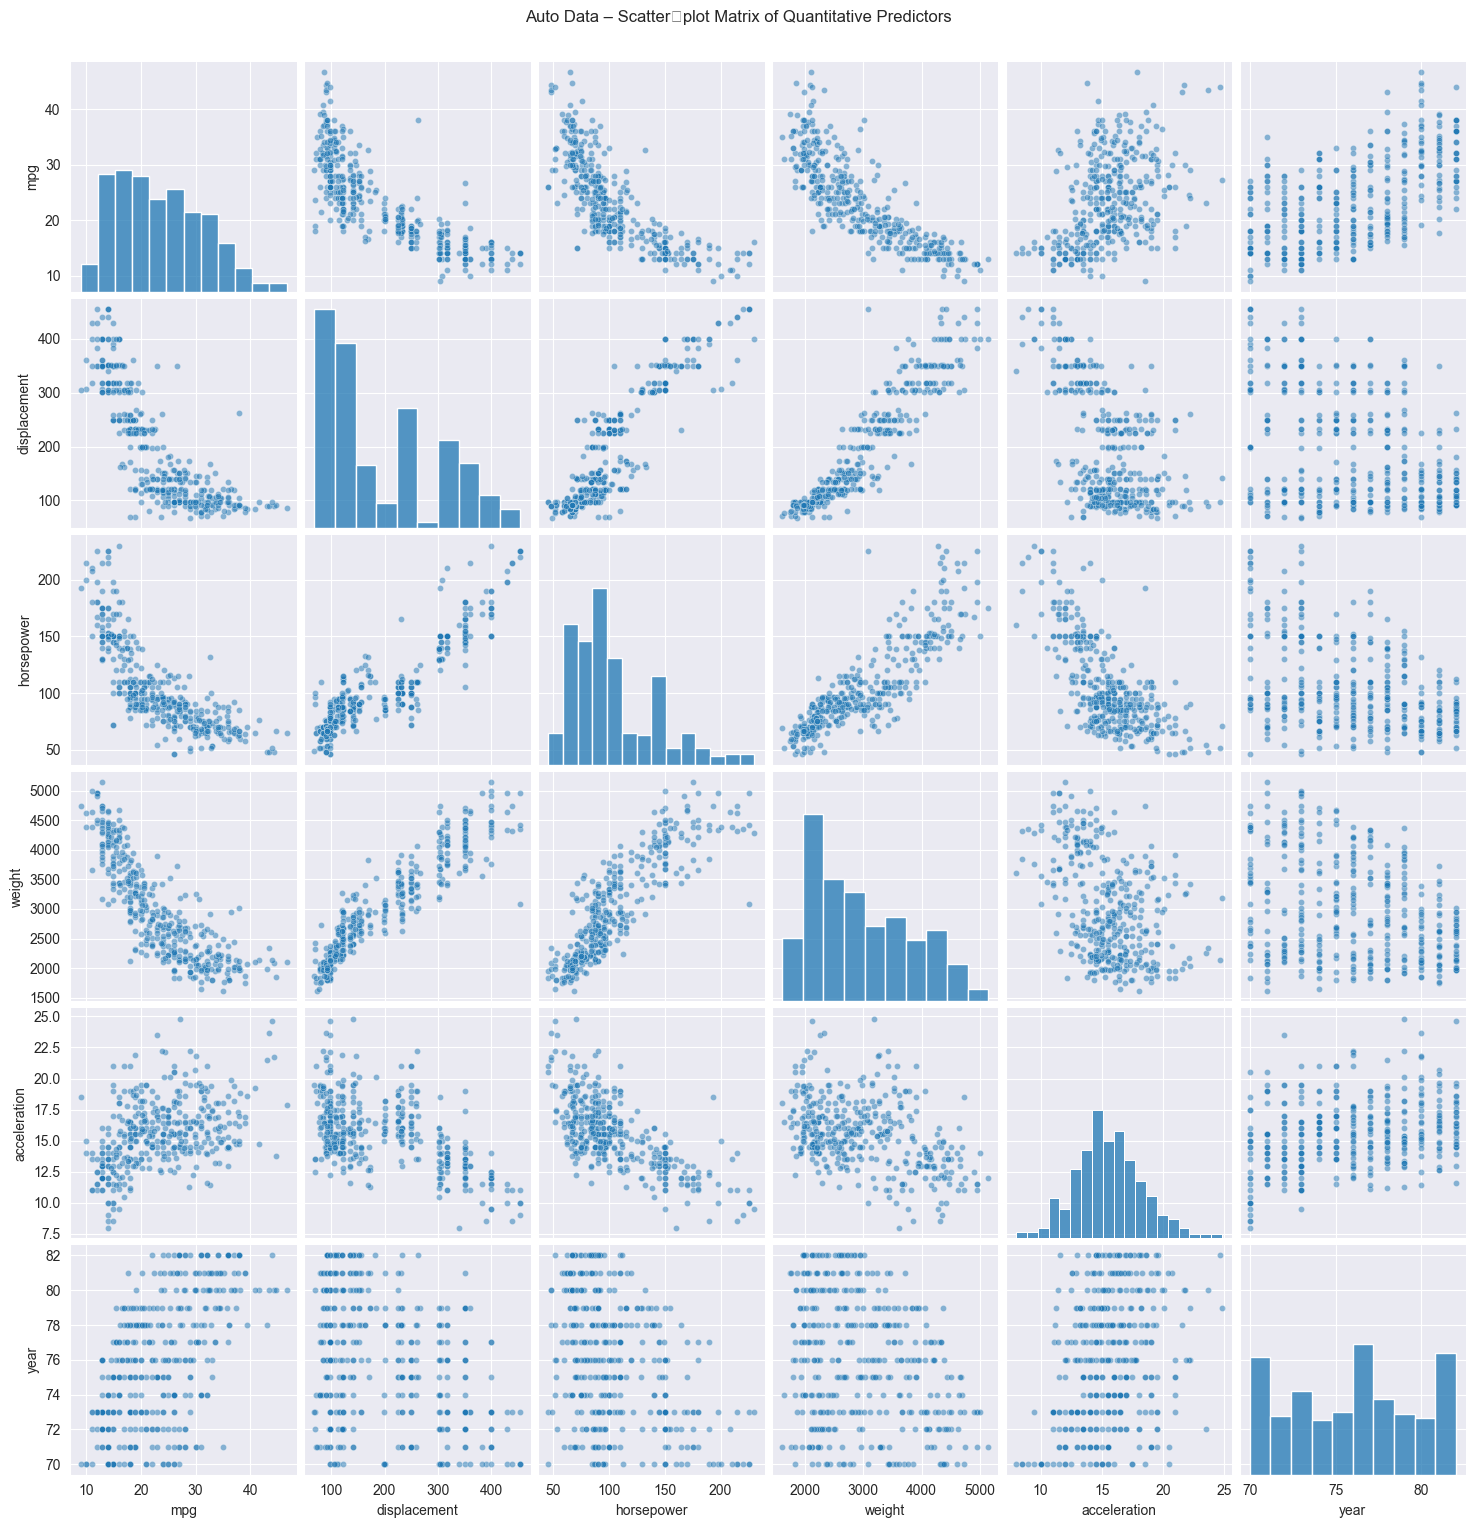

In [14]:
sns.pairplot(auto[quantitative], diag_kind='hist', plot_kws={'alpha':0.5, 's':20})
plt.suptitle('Auto Data – Scatter‑plot Matrix of Quantitative Predictors', y=1.02)
plt.show()

The pair-plot above shows:

- a strong negative mpg–weight and mpg–displacement/horsepower trend (heavier or more powerful cars get poorer mileage), mirroring the downward‐sloping clouds in the corresponding panels;

- a pronounced positive line between displacement, horsepower, and weight, indicating that larger engines go into heavier cars and deliver more horsepower;

- year shows downward drift in displacement, horsepower, and weight over time—evidence of the 1970s oil-crisis downsizing shown in lecture slides;

- acceleration is modestly faster for lighter cars and later model years.

Diagonal histograms confirm the skew: weight and displacement are right-tailed, mpg is left-tailed.

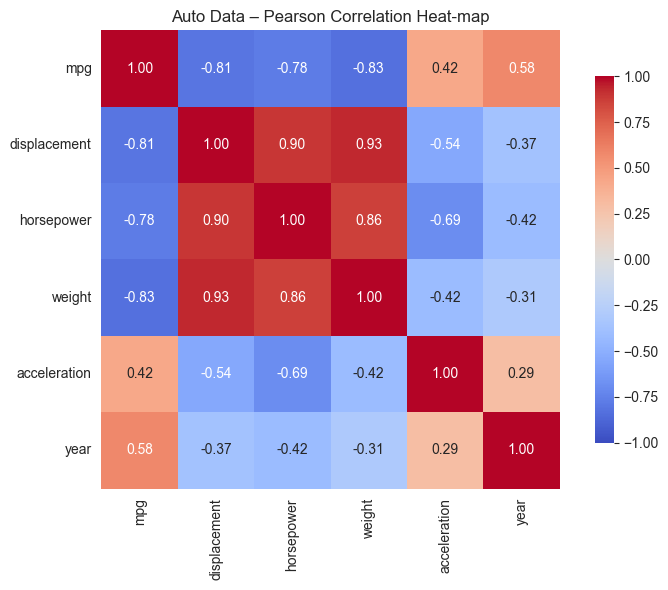

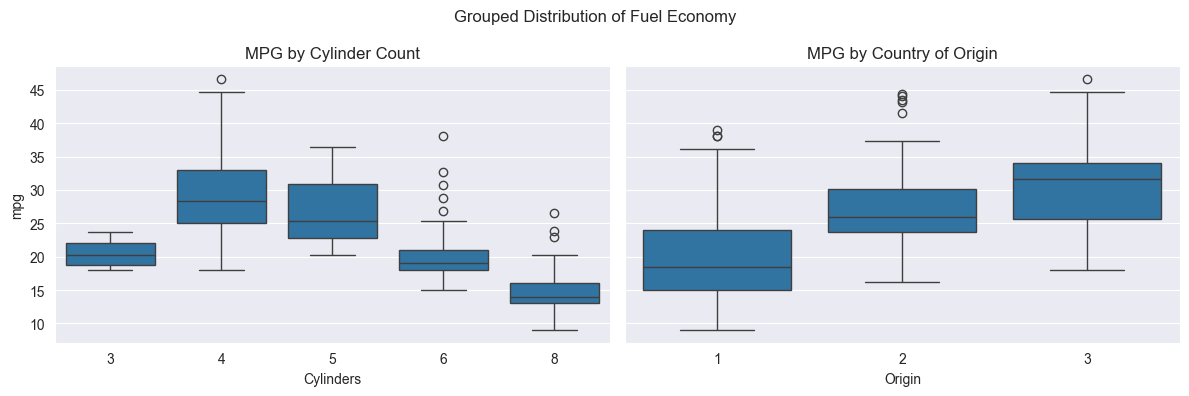

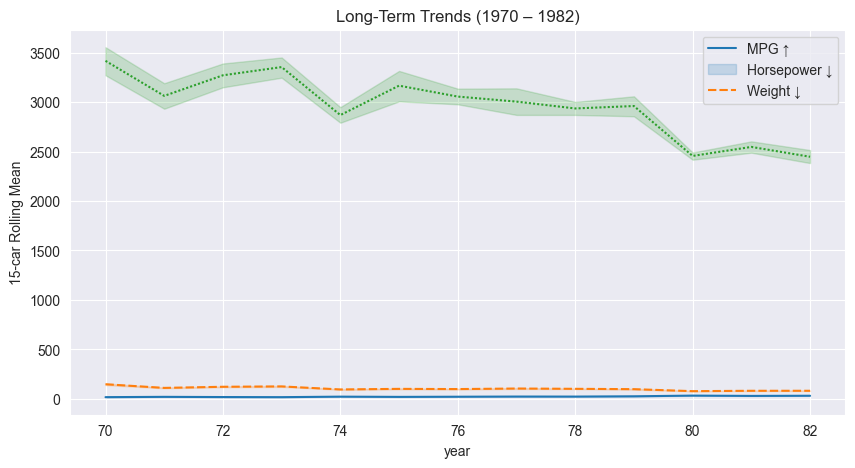

In [16]:
# 1.  HEATMAP ------------------------------------------------------
plt.figure(figsize=(8,6))
corr = auto[quantitative].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f",
            square=True, cbar_kws={"shrink":.8})
plt.title("Auto Data – Pearson Correlation Heat-map")
plt.tight_layout()
plt.show()
# 2.  BOXPLOTS BY CYLINDERS AND ORIGIN -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)

sns.boxplot(data=auto, x="cylinders", y="mpg", ax=axes[0])
axes[0].set_title("MPG by Cylinder Count"); axes[0].set_xlabel("Cylinders")

sns.boxplot(data=auto, x="origin", y="mpg", ax=axes[1])
axes[1].set_title("MPG by Country of Origin"); axes[1].set_xlabel("Origin")

plt.suptitle("Grouped Distribution of Fuel Economy")
plt.tight_layout(); plt.show()

# 3.  TIME-TREND LINES WITH SMOOTH ROLLING MEAN --------------------
plt.figure(figsize=(10,5))
rolling = (auto.sort_values("year")
                .set_index("year")[["mpg","horsepower","weight"]]
                .rolling(window=15, center=True, min_periods=5).mean())

sns.lineplot(data=rolling)
plt.ylabel("15-car Rolling Mean"); plt.title("Long-Term Trends (1970 – 1982)")
plt.legend(title="", labels=["MPG ↑", "Horsepower ↓", "Weight ↓"])
plt.show()

The new graphics reinforce what the pair-plot hinted at.
The box-plots make the categorical effects explicit: MPG falls monotonically as cylinder count rises (median ≈ 30 mpg for 4-cylinders versus < 15 mpg for 8-cylinders) and is systematically higher for European and especially Japanese cars than for U.S. models, confirming the cluster separation we saw in the scatter-matrix.

The rolling-mean panel adds the time dimension: from 1970 to 1982 weight and horsepower trend steadily downward while MPG climbs, with an especially sharp break right after 1973–74—the oil-crisis inflection visible in the displacement/weight–year panels of the pair-plot. Together, these displays show that the strong negative mpg–weight/horsepower correlations observed earlier are partly driven by categorical (cylinders, origin) and temporal (model-year) structure in the data.

**(f)** Yes. The pair-plot shows a very strong negative linear relationship between mpg and each of weight, displacement, and horsepower; their Pearson correlations in the heat-map are around –0.80 to –0.95, so those three variables should be powerful quantitative predictors of fuel economy. The time-trend panel reveals a positive association between year and mpg—cars become more economical over time—so model year (perhaps with a nonlinear term) is also informative. The box-plots indicate large step differences in mpg across cylinders and origin, suggesting that these categorical factors add explanatory power even after the continuous engine/weight variables are in the model. Acceleration shows only a weak pattern and would likely contribute little once weight and horsepower are included. Hence weight, displacement, horsepower, year, cylinders, and origin all look useful for predicting mpg, with weight or displacement probably the single most important.